In [2]:
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

from gensim.utils import simple_preprocess
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm
import torch.nn as nn
from torch.optim import AdamW
from torch.utils.data import Dataset, DataLoader

from transformers import get_linear_schedule_with_warmup, AutoTokenizer, AutoModel, logging

import warnings
warnings.filterwarnings("ignore")

logging.set_verbosity_error()
# read data ignore last col
import py_vncorenlp
import os
def seed_everything(seed_value):
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    
    if torch.cuda.is_available(): 
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = True



if 'pwd' not in locals():
    from transformers import PhobertTokenizer, AutoModel
    from transformers import DataCollatorForTokenClassification
    pwd = Path(os.getcwd())
    save_dir = pwd / 'models'
    rdrsegmenter = py_vncorenlp.VnCoreNLP(annotators=["wseg"], save_dir=str(save_dir))
    os.chdir(pwd)
    seed_everything(25)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
EPOCHS = 6
N_SPLITS = 5

/home/ubuntu/anaconda3/envs/atg/lib/python3.11/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2023-08-15 03:57:26 INFO  WordSegmenter:24 - Loading Word Segmentation model


In [ ]:
data = pd.read_csv('data - data.csv', usecols=range(0, 3))
data['wseg'] = data['comment'].apply(lambda x : " ".join(simple_preprocess(rdrsegmenter.word_segment(x))))
data.sample(10)

In [5]:
data.sample(10)

,comment,label,rate,wseg
6452,Shop phục vụ tốt.,POS,4,Shop phục_vụ tốt .
26367,"Bé nhỏ cũng có thể dắt xe, nhấc xe lên để chơi.",NEU,3,"Bé_nhỏ cũng có_thể dắt xe , nhấc xe lên để chơi ."
29602,Áo không giống hình sản phẩm lỗi lừa đảo.,NEG,1,Áo không giống hình sản_phẩm lỗi lừa_đảo .
19747,"ba lô phù hợp vs giá tiên, như hình.",NEU,3,"ba_lô phù_hợp vs giá tiên , như hình ."
1432,Rất ok mua hoài vẫn ok.,POS,5,Rất ok mua hoài vẫn ok .
445,5 sao nha!,POS,5,5 sao nha !
19210,Đóng gói sản phẩm rất đẹp và chắc chắn.,POS,5,Đóng_gói sản_phẩm rất đẹp và chắc_chắn .
12179,Ưng quá.,POS,5,Ưng quá .
11598,Thời gian giao hàng rất nhanh.Hàng ok.,POS,4,Thời_gian giao hàng rất nhanh.Hàng ok .
8113,K biết cái này tác dụng thơm ở đâu.,NEG,1,K biết cái này tác_dụng thơm ở đâu .


<Axes: xlabel='label', ylabel='count'>

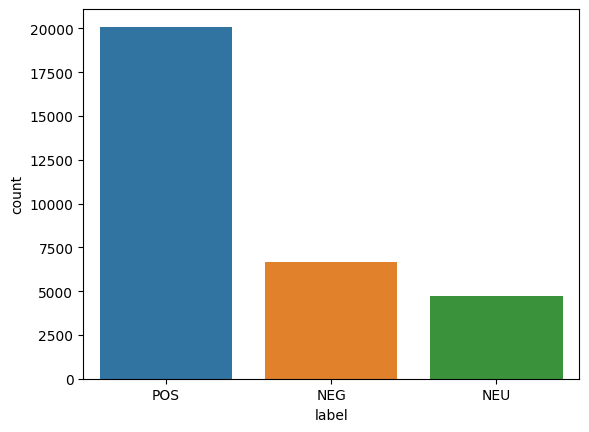

In [6]:
sns.countplot(x='label', data=data)

<Axes: xlabel='rate', ylabel='count'>

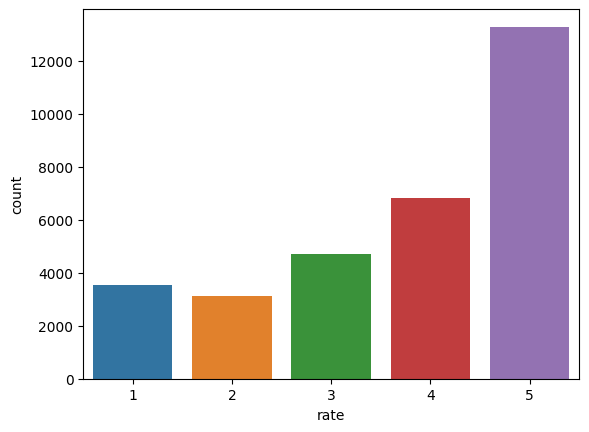

In [8]:
sns.countplot(x='rate', data=data)

In [ ]:
tokens 